# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

# loading the dataset

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# shape

In [3]:
data.shape

(303, 14)

# variable types

In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# EDA AND PRE-PROCESSING

# outcome variable count

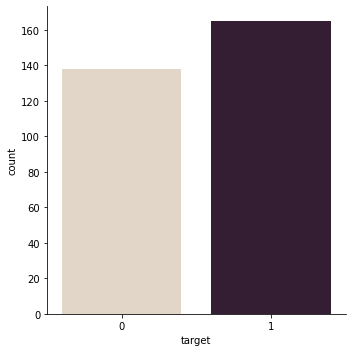

In [5]:
sns.catplot(x = "target", kind = 'count', palette = 'ch:.25', data = data)

# Categorical predictive variables

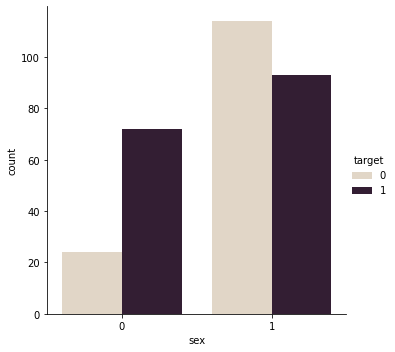

In [6]:
sns.catplot(x = "sex", kind = 'count', hue = 'target', palette = 'ch:.25', data = data)

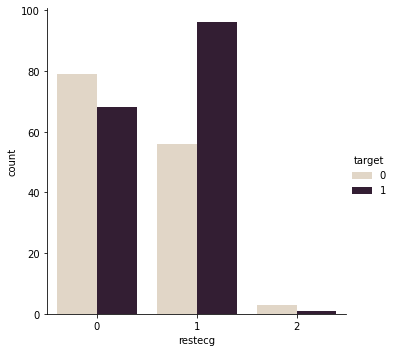

In [7]:
sns.catplot(x = "restecg", kind = 'count', hue = 'target', palette = 'ch:.25', data = data)

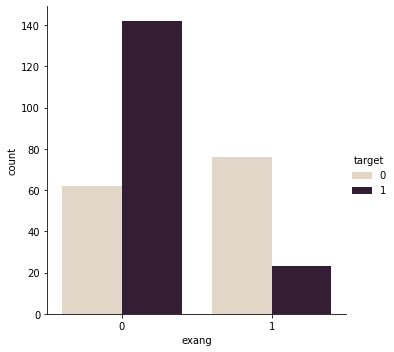

In [8]:
sns.catplot(x = "exang", kind = 'count', hue = 'target', palette = 'ch:.25', data = data)

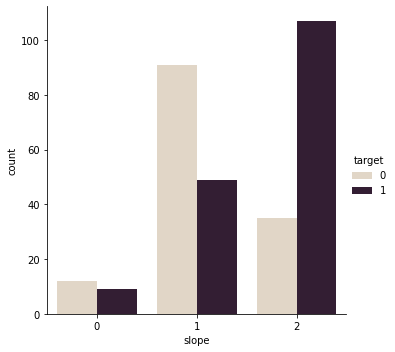

In [9]:
sns.catplot(x = "slope", kind = 'count', hue = 'target', palette = 'ch:.25', data = data)

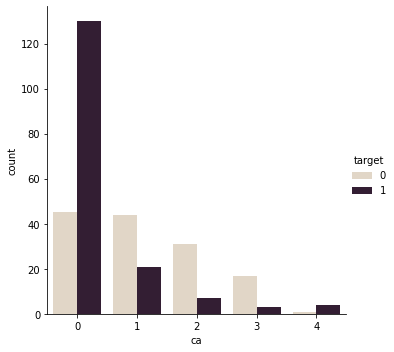

In [10]:
sns.catplot(x = "ca", kind = 'count', hue = 'target', palette = 'ch:.25', data = data)

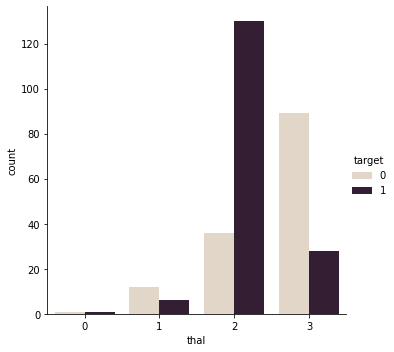

In [11]:
sns.catplot(x = "thal", kind = 'count', hue = 'target', palette = 'ch:.25', data = data)

# Distributional predictive variables

In [12]:
data[['age', 'trestbps', 'chol', 'thalach','oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


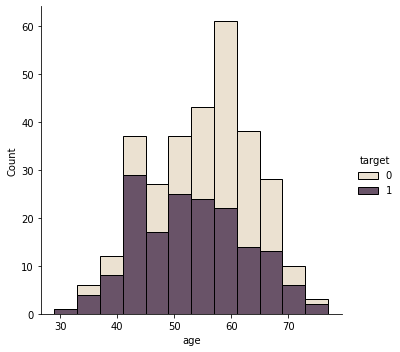

In [13]:
sns.displot(x = "age", multiple = 'stack', hue = 'target', palette = 'ch:.25', data = data)

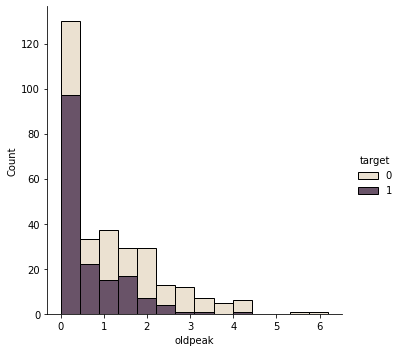

In [14]:
sns.displot(x = "oldpeak", multiple = 'stack', hue = 'target', palette = 'ch:.25', data = data)

# SPLITTING AND PREPROCESSING

# defining x_train , x_test, y_train, y_test

In [15]:
x = data.drop('target', axis =1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state =42)

# scaling the data

In [16]:
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test=sc.transform(x_test)

# Training the model

# parameters for grid search

In [17]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[3,5,7,9,11], 'weights':['uniform', 'distance']}

# finding training data and grid search

In [18]:
grid = GridSearchCV(knn, parameters, cv =4, scoring="accuracy")
grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

# displaying best parameters

In [19]:
print(grid.best_params_)

{'n_neighbors': 5, 'weights': 'uniform'}


# picking out the best model

In [20]:
model = grid.best_estimator_

# EVALUATING THE MODEL

# model score on test data

In [21]:
model.score(x_test, y_test)

0.9016393442622951

# Confusion Matrix

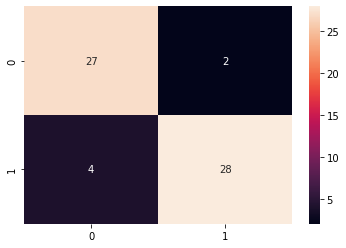

In [22]:
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm=pd.DataFrame(cm)
sns.heatmap(cm, annot =True)
plt.show()

In [23]:
TP =28
FP = 2
TN=27
FN=4
sensitivity = TP/(TP+FN)*100
specificity=TN/(TN+FP)*100
ppv = TP/(TP+FP)*100
npv =TN/(TN+FN)*100

In [24]:
print('Sensitivity', sensitivity,'%','Specificity',specificity,'%','positive predictive value', ppv,'%','negative predictive value', npv,'%')

Sensitivity 87.5 % Specificity 93.10344827586206 % positive predictive value 93.33333333333333 % negative predictive value 87.09677419354838 %


In [26]:
probs = model.predict_proba(x_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs)
print(auc)

0.9154094827586208


# ROC curve

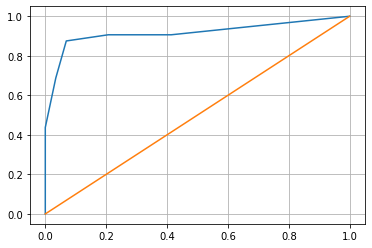

In [27]:
fpr ,tpr,_=metrics.roc_curve(y_test, probs)
plt.figure()
plt.grid()
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1])
plt.show()